In [57]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from pathlib import Path
import scipy
import matplotlib.pyplot as plt
import matplotlib

# Clean Carbon Data

Data taken from https://www.eex.com/en/market-data/environmental-markets/eua-primary-auction-spot-download . Accessed on 20/10/2022.

Read the excel file containing the Carbon Price data.

In [58]:
read_carbon_path = Path("__file__").parent.joinpath("Raw_Data", "Carbon_Data").parent.joinpath("Carbon_Data", "Carbon Price Data.xlsx")
df = pd.read_excel(read_carbon_path, index_col=False)

Clean the data by removing any duplicates, dropping unnecessary columns, adding in all missing dates (this will be used later) and renaming the columns to easier names to write.

In [59]:
df = df.drop_duplicates(subset = "Date", keep = "first")
df["Date"] = pd.to_datetime(df['Date'])
df = df.drop(df.columns[[2,3,4,5]], axis = 1)
df = (df.set_index('Date').reindex(pd.date_range('2012-01-01', '2022-02-24', freq='D')).rename_axis(['Date']).reset_index())
df.rename(columns = {'Auction Price €/tCO2':'Carbon Price'}, inplace = True)
df.head()


,Date,Carbon Price
0,2012-01-01,NaN
1,2012-01-02,NaN
2,2012-01-03,6.31
3,2012-01-04,NaN
4,2012-01-05,NaN


Save the data to the manipulated data folder

<function matplotlib.pyplot.show(close=None, block=None)>

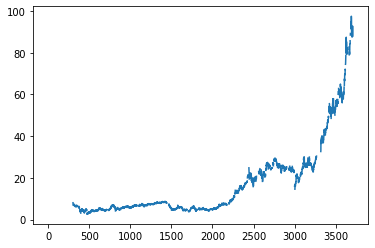

In [60]:
series = df["Carbon Price"]
series.plot()
plt.show

In [61]:
write_carbon_path = Path("__file__").parent.joinpath("Manipulated_Data", "Carbon_Data").parent.joinpath("Carbon_Data", "Daily-Carbon Prices.csv")
df.to_csv(write_carbon_path)

# Clean Coal Data

##### Data taken from https://markets.businessinsider.com/commodities/coal-price. Accessed on 24/10/2022

Read csv file containing coal data

In [62]:
read_coal_path = Path("__file__").parent.joinpath("Raw_Data", "Coal_Data").parent.joinpath("Coal_Data", "Coal Data.csv")
df = pd.read_csv(read_coal_path, index_col= False)
#df.head()

Clean the data by removing unwanted columns, renaming and dropping any duplicates and reordering the rows.

In [63]:
df["Date"] = pd.to_datetime(df['Date'])
#df = df.drop(df.columns[[2,3]], axis = 1)
df = (df.set_index('Date').reindex(pd.date_range('2012-01-01', '2022-02-24', freq='D')).rename_axis(['Date']).fillna(0).reset_index())


In [64]:
df = df.sort_values(by = "Date", ascending = True)
df = df.reindex(columns = ["Date", "Close"])
df.rename(columns = {'Close':'Coal Price'}, inplace = True)
df = df.drop_duplicates(subset = "Date", keep = "first")
df.head()

,Date,Coal Price
0,2012-01-01,0.00
1,2012-01-02,0.00
2,2012-01-03,109.35
3,2012-01-04,109.55
4,2012-01-05,110.10


In [65]:
write_coal_path = Path("__file__").parent.joinpath("Manipulated_Data", "Coal_Data").parent.joinpath("Coal_Data", "Coal-Daily.csv")
df.to_csv(write_coal_path)

# Clean Oil Data

##### Data pulled from https://datahub.io/core/oil-prices#pandas

Read csv file containing oil data

In [66]:
read_oil_path = Path("__file__").parent.joinpath("Raw_Data", "Oil_Data").parent.joinpath("Oil_Data", "Brent Crude Data.csv")
df = pd.read_csv(read_oil_path)
df.head()

,Unnamed: 0.1,Date,Unnamed: 0,Price
0,0,2012-01-01,0.0,0.00
1,1,2012-01-02,0.0,0.00
2,2,2012-01-03,6251.0,111.12
3,3,2012-01-04,6252.0,113.37
4,4,2012-01-05,6253.0,113.59


Clean the data by removing unwanted columns, renaming and reordering the columns and dropping any duplicates.

In [67]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[df.Date >= "01-01-2012"]  
df = (df.set_index('Date').reindex(pd.date_range('2012-01-01', '2022-02-24', freq='D')).rename_axis(['Date']).fillna(0).reset_index())
df = df.drop(df.columns[[1,2]], axis = 1)
df = df.drop_duplicates(subset = "Date", keep = "first")
df.rename(columns = {'Price':'Oil Price'}, inplace = True)
df.head()


,Date,Oil Price
0,2012-01-01,0.00
1,2012-01-02,0.00
2,2012-01-03,111.12
3,2012-01-04,113.37
4,2012-01-05,113.59


In [68]:
write_oil_path = Path("__file__").parent.joinpath("Manipulated_Data", "Oil_Data").parent.joinpath("Oil_Data", "Oil-Daily.csv")
df.to_csv(write_oil_path)

# Clean NatGas Data

In [69]:
read_gas_path = Path("__file__").parent.joinpath("Raw_Data", "NatGas_Data").parent.joinpath("NatGas_Data", "EU TTF NatGas Futures Price.csv")
df = pd.read_csv(read_gas_path)
df.head()

,Symbol,Date,Open,High,Low,Close
0,NGEU:COM,31/10/2022,137.5,137.75,120.500,123.352
1,NGEU:COM,28/10/2022,110.0,115.00,107.550,112.244
2,NGEU:COM,27/10/2022,98.0,110.00,96.135,107.384
3,NGEU:COM,26/10/2022,102.0,106.49,98.420,104.320
4,NGEU:COM,25/10/2022,95.0,102.00,92.400,99.794


In [70]:
df = df[["Date", "Close"]]
df["Date"] = pd.to_datetime(df["Date"], format = '%d/%m/%Y')
df = (df.set_index('Date').reindex(pd.date_range('2012-01-01', '2022-02-24', freq='D')).rename_axis(['Date']).fillna(0).reset_index())
df.rename(columns = {'Close':'NatGas Price'}, inplace = True)
df.head()

,Date,NatGas Price
0,2012-01-01,0.0
1,2012-01-02,0.0
2,2012-01-03,0.0
3,2012-01-04,0.0
4,2012-01-05,0.0


In [71]:
write_gas_path = Path("__file__").parent.joinpath("Manipulated_Data", "NatGas_Data").parent.joinpath("NatGas_Data", "NatGas-Daily.csv")
df.to_csv(write_gas_path)

# Merge all the data into a single dataframe

Read all of the data into separate dataframes.

In [72]:
read_temp_path = Path("__file__").parent.joinpath("Manipulated_Data", "Weather_Data").parent.joinpath("Weather_Data", "Temperature Index 2.csv")
read_elec_path = Path("__file__").parent.joinpath("Manipulated_Data", "Electricity_Data").parent.joinpath("Electricity_Data", "Electricity Index.csv")
df1 = pd.read_csv(write_carbon_path, index_col = False)
df2 = pd.read_csv(write_coal_path, index_col = False)
df3 = pd.read_csv(write_oil_path, index_col = False)
df4 = pd.read_csv(read_temp_path, index_col = False)
df5 = pd.read_csv(read_elec_path, index_col=False)
df6 = pd.read_csv(write_gas_path, index_col = False)

Merge the carbon and coal data

In [73]:
df = pd.merge(df1, df2, how = 'outer', on = 'Date')
df = df.drop(df.columns[[0,3]], axis = 1)

Merge the oil data with the dataframe

In [74]:
df = pd.merge(df, df3, how = 'outer', on = 'Date')
df = df.drop(df.columns[[3]], axis = 1)

Merge the NatGas data with the dataframe

In [75]:
df = pd.merge(df, df6, how = 'outer', on = 'Date')
df = df.drop(df.columns[[4]], axis = 1)
df.head()

,Date,Carbon Price,Coal Price,Oil Price,NatGas Price
0,2012-01-01,NaN,0.00,0.00,0.0
1,2012-01-02,NaN,0.00,0.00,0.0
2,2012-01-03,6.31,109.35,111.12,0.0
3,2012-01-04,NaN,109.55,113.37,0.0
4,2012-01-05,NaN,110.10,113.59,0.0


Merge the temperature index with the dataframe

In [76]:
df = pd.merge(df, df4, how = 'outer', on = 'Date')
df = df.drop(df.columns[[5,7,8]], axis = 1)
df.tail()

,Date,Carbon Price,Coal Price,Oil Price,NatGas Price,Weighted Temp,Cold Temp,Hot Temp
3703,2022-02-20,NaN,0.00,0.00,0.000,39.281313,0.0,0.0
3704,2022-02-21,87.99,185.15,98.95,72.564,39.476590,0.0,0.0
3705,2022-02-22,88.40,189.00,98.73,79.789,39.698829,0.0,0.0
3706,2022-02-23,92.80,190.65,99.29,88.891,42.076405,0.0,0.0
3707,2022-02-24,88.00,193.10,101.29,134.316,41.821095,0.0,0.0


Merge the Elec index with the dataframe

In [77]:
df = pd.merge(df, df5, how = 'outer', on = 'Date')
df.dropna(subset = "Carbon Price", inplace=True)
df= df[df["Carbon Price"] != 0]
df = df.drop(df.columns[[8]], axis = 1)
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace=True)
df.tail()

,Date,Carbon Price,Coal Price,Oil Price,NatGas Price,Weighted Temp,Cold Temp,Hot Temp,Elec Index
1932,2022-02-18,87.65,184.10,96.18,73.762,37.482347,0.0,0.0,94.090106
1933,2022-02-21,87.99,185.15,98.95,72.564,39.476590,0.0,0.0,158.882094
1934,2022-02-22,88.40,189.00,98.73,79.789,39.698829,0.0,0.0,163.197727
1935,2022-02-23,92.80,190.65,99.29,88.891,42.076405,0.0,0.0,168.229362
1936,2022-02-24,88.00,193.10,101.29,134.316,41.821095,0.0,0.0,128.282990


Remove all instances where the carbon price is zero and any places where he have an na value. This will ensure that all cells are filled with data points.

In [78]:
df = df[df["Carbon Price"] > 0]
df = df[df["Coal Price"] != 0]
df= df[df["Oil Price"] != 0]
df= df[df["NatGas Price"] != 0]
df.dropna(inplace= True)
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace=True)

In [79]:
dates = df["Date"].to_list()
phasetwo = []
for i in range(len(dates)):
    if pd.to_datetime(dates[i]).year >= 2018 and pd.to_datetime(dates[i]).year < 2020:
        phasetwo.append(1)
    else:
        phasetwo.append(0)
df["Phase two"] = phasetwo

phasethree = []
for i in range(len(dates)):
    if pd.to_datetime(dates[i]).year >= 2020:
        phasethree.append(1)
    else:
        phasethree.append(0)
df["Phase three"] = phasethree

df.tail()

,Date,Carbon Price,Coal Price,Oil Price,NatGas Price,Weighted Temp,Cold Temp,Hot Temp,Elec Index,Phase two,Phase three
1741,2022-02-18,87.65,184.10,96.18,73.762,37.482347,0.0,0.0,94.090106,0,1
1742,2022-02-21,87.99,185.15,98.95,72.564,39.476590,0.0,0.0,158.882094,0,1
1743,2022-02-22,88.40,189.00,98.73,79.789,39.698829,0.0,0.0,163.197727,0,1
1744,2022-02-23,92.80,190.65,99.29,88.891,42.076405,0.0,0.0,168.229362,0,1
1745,2022-02-24,88.00,193.10,101.29,134.316,41.821095,0.0,0.0,128.282990,0,1


Set the data to only include after a certain date

In [80]:
#df = df[df.Date >= "2018-01-01"]
df.tail()

,Date,Carbon Price,Coal Price,Oil Price,NatGas Price,Weighted Temp,Cold Temp,Hot Temp,Elec Index,Phase two,Phase three
1741,2022-02-18,87.65,184.10,96.18,73.762,37.482347,0.0,0.0,94.090106,0,1
1742,2022-02-21,87.99,185.15,98.95,72.564,39.476590,0.0,0.0,158.882094,0,1
1743,2022-02-22,88.40,189.00,98.73,79.789,39.698829,0.0,0.0,163.197727,0,1
1744,2022-02-23,92.80,190.65,99.29,88.891,42.076405,0.0,0.0,168.229362,0,1
1745,2022-02-24,88.00,193.10,101.29,134.316,41.821095,0.0,0.0,128.282990,0,1


In [81]:
df["Clean Spark Spread"] =  df["Elec Index"] - (df["NatGas Price"] * (1/0.49) + df["Carbon Price"] * 0.41 )
df["Clean Dark Spread"] = df["Elec Index"] - (df["Coal Price"] * (1/0.35 )+ df["Carbon Price"] * 0.95 )

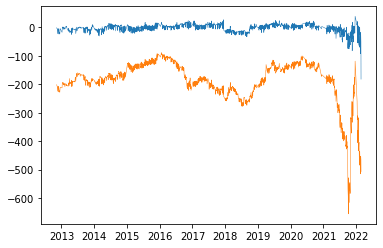

In [82]:
date = []
for i in range(len(dates)):
    date.append(matplotlib.dates.date2num(datetime.strptime(dates[i], '%Y-%m-%d')))
series = df["Clean Spark Spread"]
series2 = df["Clean Dark Spread"]
ax = plt.gca()

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))


plt.plot(date, series, linewidth=0.5)
plt.plot(date, series2, linewidth=0.5)
plt.show()   

Export final dataframe to csv.

In [83]:
write_complete_dataframe_path = Path("__file__").parent.joinpath("Manipulated_Data", "Merged_Data").parent.joinpath("Merged_Data", "Merged-Data.csv")
df.to_csv(write_complete_dataframe_path)